In [196]:
import pandas as pd
import numpy as np
import matplotlib as mp
from pathlib import Path
import re

In [197]:
ROOT = Path.cwd()
DATA_DIR = ROOT / "datasets"
IPEDS_DIR = DATA_DIR / "ipeds"
PROCESSED_DIR = IPEDS_DIR / "processed"

In [198]:
files = list(PROCESSED_DIR.glob("*.csv"))

# make a set containing the years of data we have
gradRateYears = {int(re.findall(r"\d{4}", file.name)[0]) for file in files if not re.search("4yr_gradrate_by_state", file.name) == None}
gradRateYears


{2004, 2006, 2008, 2010, 2012, 2014, 2016}

In [202]:
# check to see if there is missing data in our year interval
startYear = min(gradRateYears)
endYear = max(gradRateYears)

for year in range(startYear, endYear + 1, 2):
    if (not year in gradRateYears):
        raise FileNotFoundError(f"Missing Data for {year}")

In [200]:
# construct a dataframe with columns corresponding to state and rows correspondnig to year

rows = pd.DataFrame()
years = []
for year in range(startYear, endYear + 1, 2):
    oneYearData = pd.read_csv(PROCESSED_DIR / f"class_{year}_4yr_gradrate_by_state.csv")
    
    row = oneYearData.iloc[:, 1]

    rows = pd.concat([rows, row], axis = 1)
    years.append(year)

LABELS = np.insert(pd.read_csv(PROCESSED_DIR / f"class_{years[0]}_4yr_gradrate_by_state.csv").iloc[:, 0], 0, "YEAR")

rows = rows.transpose().reset_index()
rows = rows.iloc[:, 1:]
rows.insert(0, "YEAR", years)

rows.columns = LABELS
rows = rows.set_index("YEAR")
rows


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unknown,US Total,GRAND TOTAL
YEAR,,,,,,,,,,,,,,,,,,,,,
2004,0.128204,0.159106,0.123956,0.119581,0.150246,0.157789,0.295189,0.268125,0.200620,0.144276,...,0.129562,0.409724,0.280129,0.210792,0.156328,0.184364,0.123068,0.064824,0.181418,0.178991
2006,0.148438,0.149536,0.141514,0.140042,0.152223,0.172603,0.311351,0.256426,0.221337,0.166958,...,0.121837,0.397252,0.268843,0.233741,0.153102,0.190850,0.116208,0.059736,0.192627,0.191019
2008,0.137311,0.166286,0.141873,0.139251,0.116451,0.188237,0.312639,0.245458,0.227919,0.152500,...,0.136710,0.400814,0.252347,0.242936,0.148965,0.194372,0.107334,0.067905,0.187077,0.186847
2010,0.132851,0.145097,0.142820,0.137508,0.128133,0.181916,0.312616,0.259938,0.228162,0.142648,...,0.130664,0.364213,0.262959,0.244447,0.143286,0.196394,0.096179,0.105974,0.184646,0.185070
2012,0.151976,0.155081,0.149236,0.171163,0.157368,0.209238,0.334058,0.259627,0.243525,0.157146,...,0.168374,0.390329,0.282564,0.264944,0.171801,0.224490,0.105080,0.128932,0.206614,0.208058
2014,0.169670,0.175106,0.158688,0.199377,0.171001,0.246908,0.367168,0.309673,0.272951,0.176239,...,0.192819,0.403933,0.293741,0.273841,0.187669,0.266302,0.135076,0.151081,0.228370,0.229951
2016,0.200323,0.196919,0.188544,0.224057,0.198382,0.272941,0.389530,0.303005,0.339796,0.212714,...,0.187894,0.433965,0.326474,0.280355,0.228054,0.290970,0.134764,0.155965,0.255575,0.257281


<Axes: xlabel='YEAR'>

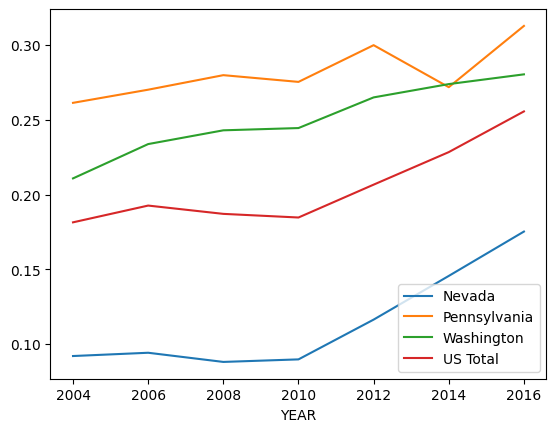

In [201]:
# plotting for sanity

rows.plot(y=["Nevada", "Pennsylvania", "Washington", "US Total"])